In [160]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv('cash or e-zpass train.csv')
df

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass)
0,03/19/2018,48A,48,1200,2L,1,E-ZPass
1,02/24/2018,24,16H,715,2L,4,E-ZPass
2,03/01/2018,39,35,345,2L,1,CASH
3,01/18/2018,34A,24,1445,2L,2,CASH
4,03/06/2018,24,21,215,2L,1,E-ZPass
...,...,...,...,...,...,...,...
6010962,01/04/2018,25A,17,700,5H,1,E-ZPass
6010963,03/12/2018,32,34A,1145,2L,17,E-ZPass
6010964,02/23/2018,36,48A,1915,5S,1,E-ZPass
6010965,02/15/2018,20,19,45,2L,2,E-ZPass


In [3]:
# ori_df = df['Interval Beginning Time']
# ori_df.to_csv('original_df.csv', index=False)

In [4]:
df_test = pd.read_csv('cash or e-zpass test.csv')
df_test

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count
0,03/03/2018,27,15,1700,2L,1
1,02/02/2018,35,38,2330,2L,2
2,03/28/2018,24,18,930,2L,6
3,02/16/2018,45,50,315,2L,1
4,01/28/2018,48,50,0,2L,4
...,...,...,...,...,...,...
2960622,02/18/2018,55,57,1900,2L,19
2960623,01/31/2018,25A,28,1130,3H,1
2960624,03/17/2018,24,22,1900,2L,5
2960625,01/23/2018,23,50,930,2L,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010967 entries, 0 to 6010966
Data columns (total 7 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   Date                            object
 1   Entrance                        object
 2   Exit                            object
 3   Interval Beginning Time         int64 
 4   Vehicle Class                   object
 5   Vehicle Count                   int64 
 6   Payment Type (Cash or E-ZPass)  object
dtypes: int64(2), object(5)
memory usage: 321.0+ MB


In [6]:
df.describe()

,Interval Beginning Time,Vehicle Count
count,6.010967e+06,6.010967e+06
mean,1.296968e+03,3.824114e+00
std,5.656688e+02,1.024227e+01
min,0.000000e+00,1.000000e+00
25%,9.000000e+02,1.000000e+00
50%,1.330000e+03,1.000000e+00
75%,1.730000e+03,3.000000e+00
max,2.345000e+03,4.650000e+02


In [7]:
df.isna().sum()

Date                              0
Entrance                          0
Exit                              0
Interval Beginning Time           0
Vehicle Class                     0
Vehicle Count                     0
Payment Type (Cash or E-ZPass)    0
dtype: int64

In [8]:
df['Vehicle Class'].value_counts()

2L    4074859
5H     697909
2H     357624
5S     346723
3H     162088
4H     136555
6S      55263
6H      49722
4L      47850
3L      34071
7H      28546
7S      19757
Name: Vehicle Class, dtype: int64

In [9]:
#2L, 3L, 4L, 2H, 3H, 4H, 5H, 6H, 7H, 5S, 6S, 7S


In [10]:
df.corr()

/var/folders/k9/lb01bjlx50d4h_fh2nrld7sc0000gn/T/ipykernel_68015/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Interval Beginning Time,Vehicle Count
Interval Beginning Time,1.000000,0.026626
Vehicle Count,0.026626,1.000000


In [11]:
df['Payment Type (Cash or E-ZPass)'].value_counts()

E-ZPass    4121373
CASH       1889594
Name: Payment Type (Cash or E-ZPass), dtype: int64

<AxesSubplot: xlabel='Payment Type (Cash or E-ZPass)', ylabel='count'>

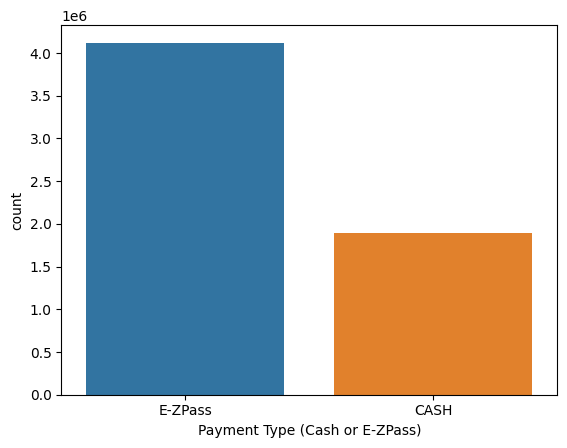

In [12]:
sns.countplot(x=df['Payment Type (Cash or E-ZPass)'])

### Number of E-ZPass values greater than Number of CASH values, still I am not making them equal as the number of E-Z Pass and number of CASH values are high in number as seen in cell number 11

In [13]:
# Perform chi-square test
contingency_table = pd.crosstab(df['Entrance'], df['Exit'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

0.0

In [14]:
df['Entrance'].value_counts()

24     326097
50     305857
15     223446
B3     207453
36     191790
39     188243
23     185030
46     182664
45     181511
17     176572
34A    159925
31     154227
55     151359
33     148577
41     146628
25A    132374
35     130087
25     119238
27     117591
19     117368
48A    112595
42     108303
40     105377
61     100843
18      96932
47      96734
21      96463
34      95961
49      95482
26      94898
38      92021
48      91923
28      90902
44      89218
32      85576
20      82258
21B     81720
B1      81705
37      81379
43      81234
30      73114
59      68788
22      68719
56      60010
57      57676
58      54938
29      50235
16      46879
57A     37404
29A     31134
B2      30794
60      23715
Name: Entrance, dtype: int64

In [15]:
df['Exit'].value_counts()

24     320970
50     305311
15     217375
B3     207762
36     192824
23     188724
39     187901
45     186545
46     183136
17     172611
34A    161681
31     155607
55     146995
41     145072
33     141857
25A    131063
35     129629
27     122375
19     117868
25     115201
42     108725
48A    107576
40     104065
61     103931
49      99356
47      98957
26      98833
18      98254
21      96872
34      93918
48      90049
32      89766
28      88830
38      88582
44      88524
37      88358
43      82966
21B     81618
B1      81234
20      80439
30      75051
22      71335
59      71184
56      60075
57      55989
58      55504
29      49812
16H     48142
57A     36360
29A     30812
B2      30648
60      24695
Name: Exit, dtype: int64

In [16]:
df

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass)
0,03/19/2018,48A,48,1200,2L,1,E-ZPass
1,02/24/2018,24,16H,715,2L,4,E-ZPass
2,03/01/2018,39,35,345,2L,1,CASH
3,01/18/2018,34A,24,1445,2L,2,CASH
4,03/06/2018,24,21,215,2L,1,E-ZPass
...,...,...,...,...,...,...,...
6010962,01/04/2018,25A,17,700,5H,1,E-ZPass
6010963,03/12/2018,32,34A,1145,2L,17,E-ZPass
6010964,02/23/2018,36,48A,1915,5S,1,E-ZPass
6010965,02/15/2018,20,19,45,2L,2,E-ZPass


In [17]:
df['Year'] = df['Date'].str.slice(6 , 10).astype(int)
df['Day'] = df['Date'].str.slice(3 , 5).astype(int)
df['Month'] = df['Date'].str.slice(0 , 2).astype(int)

In [18]:
df

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Day,Month
0,03/19/2018,48A,48,1200,2L,1,E-ZPass,2018,19,3
1,02/24/2018,24,16H,715,2L,4,E-ZPass,2018,24,2
2,03/01/2018,39,35,345,2L,1,CASH,2018,1,3
3,01/18/2018,34A,24,1445,2L,2,CASH,2018,18,1
4,03/06/2018,24,21,215,2L,1,E-ZPass,2018,6,3
...,...,...,...,...,...,...,...,...,...,...
6010962,01/04/2018,25A,17,700,5H,1,E-ZPass,2018,4,1
6010963,03/12/2018,32,34A,1145,2L,17,E-ZPass,2018,12,3
6010964,02/23/2018,36,48A,1915,5S,1,E-ZPass,2018,23,2
6010965,02/15/2018,20,19,45,2L,2,E-ZPass,2018,15,2


In [19]:
df.Year.value_counts()

2018    6010967
Name: Year, dtype: int64

In [20]:
df.Month.value_counts()

3    2125194
1    2005461
2    1880312
Name: Month, dtype: int64

In [21]:
df = df.drop(['Day'], axis=1)

In [22]:
df

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month
0,03/19/2018,48A,48,1200,2L,1,E-ZPass,2018,3
1,02/24/2018,24,16H,715,2L,4,E-ZPass,2018,2
2,03/01/2018,39,35,345,2L,1,CASH,2018,3
3,01/18/2018,34A,24,1445,2L,2,CASH,2018,1
4,03/06/2018,24,21,215,2L,1,E-ZPass,2018,3
...,...,...,...,...,...,...,...,...,...
6010962,01/04/2018,25A,17,700,5H,1,E-ZPass,2018,1
6010963,03/12/2018,32,34A,1145,2L,17,E-ZPass,2018,3
6010964,02/23/2018,36,48A,1915,5S,1,E-ZPass,2018,2
6010965,02/15/2018,20,19,45,2L,2,E-ZPass,2018,2


In [23]:
df = df.drop(['Date'], axis = 1)

In [24]:
df

,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month
0,48A,48,1200,2L,1,E-ZPass,2018,3
1,24,16H,715,2L,4,E-ZPass,2018,2
2,39,35,345,2L,1,CASH,2018,3
3,34A,24,1445,2L,2,CASH,2018,1
4,24,21,215,2L,1,E-ZPass,2018,3
...,...,...,...,...,...,...,...,...
6010962,25A,17,700,5H,1,E-ZPass,2018,1
6010963,32,34A,1145,2L,17,E-ZPass,2018,3
6010964,36,48A,1915,5S,1,E-ZPass,2018,2
6010965,20,19,45,2L,2,E-ZPass,2018,2


In [25]:
# Perform chi-square test
contingency_table = pd.crosstab(df['Entrance'], df['Exit'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

0.0

In [26]:
df = df.drop(['Exit'], axis = 1)

### Dropping Exit column as it's p value is less than 5

In [27]:
df

,Entrance,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month
0,48A,1200,2L,1,E-ZPass,2018,3
1,24,715,2L,4,E-ZPass,2018,2
2,39,345,2L,1,CASH,2018,3
3,34A,1445,2L,2,CASH,2018,1
4,24,215,2L,1,E-ZPass,2018,3
...,...,...,...,...,...,...,...
6010962,25A,700,5H,1,E-ZPass,2018,1
6010963,32,1145,2L,17,E-ZPass,2018,3
6010964,36,1915,5S,1,E-ZPass,2018,2
6010965,20,45,2L,2,E-ZPass,2018,2


In [28]:
new_df = pd.DataFrame(columns=['Hour', 'Minutes'])

In [29]:
def add_colon(s):
    s = str(s)
    if len(str(s)) == 4:
        return (s[:2] + ':' + s[2:])
    elif len(str(s)) == 3:
        return ('0'+s[:1] + ':' + s[1:])
    elif len(str(s)) == 2:
        return ('00:' + s)
    elif len(str(s)) == 1:
        return ('00:00')

In [30]:
df['Interval Beginning Time'] = df['Interval Beginning Time'].apply(lambda x:add_colon(x))

In [31]:
if len(str(df['Interval Beginning Time']))>247:
    print(len(str(df['Interval Beginning Time'])))

248


In [32]:
df

,Entrance,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month
0,48A,12:00,2L,1,E-ZPass,2018,3
1,24,07:15,2L,4,E-ZPass,2018,2
2,39,03:45,2L,1,CASH,2018,3
3,34A,14:45,2L,2,CASH,2018,1
4,24,02:15,2L,1,E-ZPass,2018,3
...,...,...,...,...,...,...,...
6010962,25A,07:00,5H,1,E-ZPass,2018,1
6010963,32,11:45,2L,17,E-ZPass,2018,3
6010964,36,19:15,5S,1,E-ZPass,2018,2
6010965,20,00:45,2L,2,E-ZPass,2018,2


In [33]:
# new_df = df['Interval Beginning Time']
# new_df.to_csv('df.csv', index=False)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010967 entries, 0 to 6010966
Data columns (total 7 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   Entrance                        object
 1   Interval Beginning Time         object
 2   Vehicle Class                   object
 3   Vehicle Count                   int64 
 4   Payment Type (Cash or E-ZPass)  object
 5   Year                            int64 
 6   Month                           int64 
dtypes: int64(3), object(4)
memory usage: 321.0+ MB


In [35]:
# df['Interval Beginning Time'] = pd.to_datetime(df['Interval Beginning Time'], format='%H%M')

In [36]:
df['Hour'] = df['Interval Beginning Time'].str.slice(0,2)
df['Minute'] = df['Interval Beginning Time'].str.slice(3,5)

In [37]:
df

,Entrance,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month,Hour,Minute
0,48A,12:00,2L,1,E-ZPass,2018,3,12,00
1,24,07:15,2L,4,E-ZPass,2018,2,07,15
2,39,03:45,2L,1,CASH,2018,3,03,45
3,34A,14:45,2L,2,CASH,2018,1,14,45
4,24,02:15,2L,1,E-ZPass,2018,3,02,15
...,...,...,...,...,...,...,...,...,...
6010962,25A,07:00,5H,1,E-ZPass,2018,1,07,00
6010963,32,11:45,2L,17,E-ZPass,2018,3,11,45
6010964,36,19:15,5S,1,E-ZPass,2018,2,19,15
6010965,20,00:45,2L,2,E-ZPass,2018,2,00,45


In [38]:
df['Hour'] = df['Hour'].astype(int)
df['Minute'] = df['Minute'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010967 entries, 0 to 6010966
Data columns (total 9 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   Entrance                        object
 1   Interval Beginning Time         object
 2   Vehicle Class                   object
 3   Vehicle Count                   int64 
 4   Payment Type (Cash or E-ZPass)  object
 5   Year                            int64 
 6   Month                           int64 
 7   Hour                            int64 
 8   Minute                          int64 
dtypes: int64(5), object(4)
memory usage: 412.7+ MB


In [40]:
df


,Entrance,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month,Hour,Minute
0,48A,12:00,2L,1,E-ZPass,2018,3,12,0
1,24,07:15,2L,4,E-ZPass,2018,2,7,15
2,39,03:45,2L,1,CASH,2018,3,3,45
3,34A,14:45,2L,2,CASH,2018,1,14,45
4,24,02:15,2L,1,E-ZPass,2018,3,2,15
...,...,...,...,...,...,...,...,...,...
6010962,25A,07:00,5H,1,E-ZPass,2018,1,7,0
6010963,32,11:45,2L,17,E-ZPass,2018,3,11,45
6010964,36,19:15,5S,1,E-ZPass,2018,2,19,15
6010965,20,00:45,2L,2,E-ZPass,2018,2,0,45


In [41]:
df.drop(['Interval Beginning Time'], axis=1, inplace=True)

In [42]:
df

,Entrance,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month,Hour,Minute
0,48A,2L,1,E-ZPass,2018,3,12,0
1,24,2L,4,E-ZPass,2018,2,7,15
2,39,2L,1,CASH,2018,3,3,45
3,34A,2L,2,CASH,2018,1,14,45
4,24,2L,1,E-ZPass,2018,3,2,15
...,...,...,...,...,...,...,...,...
6010962,25A,5H,1,E-ZPass,2018,1,7,0
6010963,32,2L,17,E-ZPass,2018,3,11,45
6010964,36,5S,1,E-ZPass,2018,2,19,15
6010965,20,2L,2,E-ZPass,2018,2,0,45


### Performing label encoding on Entrance and Vehicle Class columns

In [43]:
le = LabelEncoder()
df['Entrance'] = le.fit_transform(df['Entrance'])

In [44]:
df.Entrance.value_counts()

10    326097
40    305857
0     223446
51    207453
25    191790
28    188243
9     185030
35    182664
34    181511
2     176572
23    159925
19    154227
41    151359
21    148577
30    146628
12    132374
24    130087
11    119238
14    117591
4     117368
38    112595
31    108303
29    105377
48    100843
3      96932
36     96734
6      96463
22     95961
39     95482
13     94898
27     92021
37     91923
15     90902
33     89218
20     85576
5      82258
7      81720
49     81705
26     81379
32     81234
18     73114
46     68788
8      68719
42     60010
43     57676
45     54938
16     50235
1      46879
44     37404
17     31134
50     30794
47     23715
Name: Entrance, dtype: int64

In [45]:
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])

In [46]:
df['Vehicle Class']

0          1
1          1
2          1
3          1
4          1
          ..
6010962    6
6010963    1
6010964    7
6010965    1
6010966    1
Name: Vehicle Class, Length: 6010967, dtype: int64

In [47]:
df

,Entrance,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month,Hour,Minute
0,38,1,1,E-ZPass,2018,3,12,0
1,10,1,4,E-ZPass,2018,2,7,15
2,28,1,1,CASH,2018,3,3,45
3,23,1,2,CASH,2018,1,14,45
4,10,1,1,E-ZPass,2018,3,2,15
...,...,...,...,...,...,...,...,...
6010962,12,6,1,E-ZPass,2018,1,7,0
6010963,20,1,17,E-ZPass,2018,3,11,45
6010964,25,7,1,E-ZPass,2018,2,19,15
6010965,5,1,2,E-ZPass,2018,2,0,45


In [48]:
df_feature = df.iloc[:, :3].join(df.iloc[:,4:])

In [49]:
df_feature

,Entrance,Vehicle Class,Vehicle Count,Year,Month,Hour,Minute
0,38,1,1,2018,3,12,0
1,10,1,4,2018,2,7,15
2,28,1,1,2018,3,3,45
3,23,1,2,2018,1,14,45
4,10,1,1,2018,3,2,15
...,...,...,...,...,...,...,...
6010962,12,6,1,2018,1,7,0
6010963,20,1,17,2018,3,11,45
6010964,25,7,1,2018,2,19,15
6010965,5,1,2,2018,2,0,45


In [50]:
df_target = pd.DataFrame(df.iloc[:,3])

In [51]:
df_target

,Payment Type (Cash or E-ZPass)
0,E-ZPass
1,E-ZPass
2,CASH
3,CASH
4,E-ZPass
...,...
6010962,E-ZPass
6010963,E-ZPass
6010964,E-ZPass
6010965,E-ZPass


## Train Test Split

In [52]:
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size = 0.2, random_state = 42)

In [53]:
logr = LogisticRegression()
logr.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [54]:
hyp = logr.predict(test_x)
accuracy_score(test_y, hyp)

0.6855698830637984

In [55]:
parameters ={'penalty':['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rs = RandomizedSearchCV(logr, parameters, n_iter=10)
rs.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/valid

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [56]:
rs.best_params_

{'penalty': 'l2', 'C': 0.1}

In [57]:
logr = LogisticRegression(penalty = 'l2', C = 0.1)
logr.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1)

In [58]:
logr_hyp = logr.predict(test_x)
accuracy_score(test_y, logr_hyp)

0.6855707148763012

### KNN

In [61]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
knn_hyp = knn.predict(test_x)
accuracy_score(test_y, knn_hyp)

0.6599134582272079

### XGB

In [63]:
train_y_num = le.fit_transform(train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
train_y

,Payment Type (Cash or E-ZPass)
1641524,E-ZPass
5797214,E-ZPass
2864682,CASH
4965863,CASH
4706230,E-ZPass
...,...
1570006,E-ZPass
2234489,CASH
4926484,CASH
4304572,CASH


In [122]:
train_y_num

array([1, 1, 0, ..., 0, 0, 0])

In [64]:
test_y_num = le.fit_transform(test_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
xgb = XGBClassifier(random_state=1038)
xgb.fit(train_x, train_y_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1038, ...)

In [66]:
xgb_hyp = xgb.predict(test_x)
accuracy_score(test_y_num, xgb_hyp)

0.6941674970928153

In [67]:
params ={
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'colsample_bytree':[0.3, 0.5, 0.7]
}

scoring = 'accuracy'
folds = 5

## Confusion Matrix

In [141]:
confusion_matrix(test_y_num, xgb_hyp)

array([[ 32839, 344473],
       [ 26218, 798664]])

In [142]:
xgb.classes_

array([0, 1])

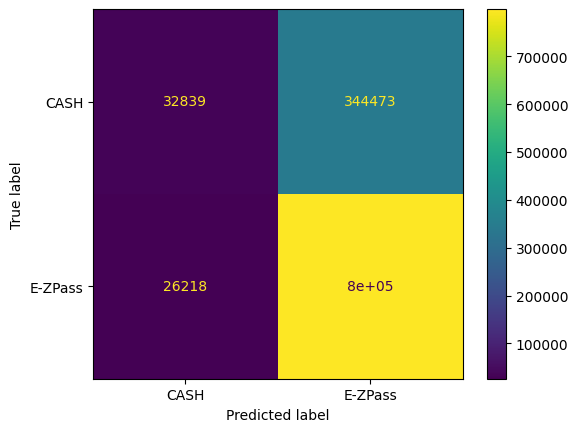

In [158]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y_num, xgb_hyp),
                              display_labels=['CASH', 'E-ZPass'])
disp.plot()
plt.show()

### Gaussian Naive Bayes

In [69]:
gnb = GaussianNB()
gnb.fit(train_x, train_y)
gnb_hyp = gnb.predict(test_x)
accuracy_score(test_y, gnb_hyp)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5180553221859368

### XGB is giving the best accuracy score

### Below I am trying different things but for test features I am going with the above XGB model which provides me with the best accuracy

### Creating a new dataframe using 800000 Cash and 800000 E-Z Pass

In [70]:
new_df = pd.concat([df_feature, df_target], axis=1)

In [71]:
new_df

,Entrance,Vehicle Class,Vehicle Count,Year,Month,Hour,Minute,Payment Type (Cash or E-ZPass)
0,38,1,1,2018,3,12,0,E-ZPass
1,10,1,4,2018,2,7,15,E-ZPass
2,28,1,1,2018,3,3,45,CASH
3,23,1,2,2018,1,14,45,CASH
4,10,1,1,2018,3,2,15,E-ZPass
...,...,...,...,...,...,...,...,...
6010962,12,6,1,2018,1,7,0,E-ZPass
6010963,20,1,17,2018,3,11,45,E-ZPass
6010964,25,7,1,2018,2,19,15,E-ZPass
6010965,5,1,2,2018,2,0,45,E-ZPass


In [72]:
pass_df = new_df[new_df['Payment Type (Cash or E-ZPass)'] == 'E-ZPass'].head(800000)

In [73]:
cash_df = new_df[new_df['Payment Type (Cash or E-ZPass)'] == 'CASH'].head(800000)

In [74]:
reduce_df = pd.concat([pass_df, cash_df])

In [75]:
reduce_df

,Entrance,Vehicle Class,Vehicle Count,Year,Month,Hour,Minute,Payment Type (Cash or E-ZPass)
0,38,1,1,2018,3,12,0,E-ZPass
1,10,1,4,2018,2,7,15,E-ZPass
4,10,1,1,2018,3,2,15,E-ZPass
8,6,4,1,2018,3,10,15,E-ZPass
9,0,7,1,2018,2,10,0,E-ZPass
...,...,...,...,...,...,...,...,...
2548348,2,6,1,2018,1,5,45,CASH
2548349,12,1,3,2018,3,17,45,CASH
2548352,6,1,2,2018,3,9,30,CASH
2548353,12,1,1,2018,2,6,30,CASH


In [76]:
reduce_df['Vehicle Class'].value_counts()

1     1163000
6      164332
0       85266
7       67138
2       33672
4       28994
5       16095
9       10868
8       10513
3       10492
10       5830
11       3800
Name: Vehicle Class, dtype: int64

In [77]:
df_new_feature = reduce_df.iloc[:, :-1]
df_new_feature

,Entrance,Vehicle Class,Vehicle Count,Year,Month,Hour,Minute
0,38,1,1,2018,3,12,0
1,10,1,4,2018,2,7,15
4,10,1,1,2018,3,2,15
8,6,4,1,2018,3,10,15
9,0,7,1,2018,2,10,0
...,...,...,...,...,...,...,...
2548348,2,6,1,2018,1,5,45
2548349,12,1,3,2018,3,17,45
2548352,6,1,2,2018,3,9,30
2548353,12,1,1,2018,2,6,30


In [78]:
df_new_target = pd.DataFrame(reduce_df.iloc[:, -1])
df_new_target

,Payment Type (Cash or E-ZPass)
0,E-ZPass
1,E-ZPass
4,E-ZPass
8,E-ZPass
9,E-ZPass
...,...
2548348,CASH
2548349,CASH
2548352,CASH
2548353,CASH


## Train Test Split

In [79]:
train_new_x, test_new_x, train_new_y, test_new_y = train_test_split(df_new_feature, df_new_target, test_size = 0.2, random_state = 42)

### XGB

In [80]:
train_new_y_num = le.transform(train_new_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [81]:
test_new_y_num = le.transform(test_new_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [82]:
params ={
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'colsample_bytree':[0.3, 0.5, 0.7]
}

scoring = 'accuracy'
folds = 5

In [83]:
from sklearn.model_selection import RandomizedSearchCV

xgb_reduce = XGBClassifier(random_state = 1038)
xgb_ran_search = RandomizedSearchCV(xgb_reduce, params, cv = folds, n_jobs = -1, n_iter=10)
xgb_ran_search.fit(train_new_x, train_new_y_num)
accuracy_score(test_new_y_num, xgb_ran_search.predict(test_new_x))

0.67179375

### Try a differenty way

In [84]:
df

,Entrance,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month,Hour,Minute
0,38,1,1,E-ZPass,2018,3,12,0
1,10,1,4,E-ZPass,2018,2,7,15
2,28,1,1,CASH,2018,3,3,45
3,23,1,2,CASH,2018,1,14,45
4,10,1,1,E-ZPass,2018,3,2,15
...,...,...,...,...,...,...,...,...
6010962,12,6,1,E-ZPass,2018,1,7,0
6010963,20,1,17,E-ZPass,2018,3,11,45
6010964,25,7,1,E-ZPass,2018,2,19,15
6010965,5,1,2,E-ZPass,2018,2,0,45


In [85]:
df_copy = df.copy()
df_copy

,Entrance,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month,Hour,Minute
0,38,1,1,E-ZPass,2018,3,12,0
1,10,1,4,E-ZPass,2018,2,7,15
2,28,1,1,CASH,2018,3,3,45
3,23,1,2,CASH,2018,1,14,45
4,10,1,1,E-ZPass,2018,3,2,15
...,...,...,...,...,...,...,...,...
6010962,12,6,1,E-ZPass,2018,1,7,0
6010963,20,1,17,E-ZPass,2018,3,11,45
6010964,25,7,1,E-ZPass,2018,2,19,15
6010965,5,1,2,E-ZPass,2018,2,0,45


In [86]:
df_copy.drop(['Hour'], axis=1, inplace=True)

In [87]:
df_copy.drop(['Minute'], axis=1, inplace=True)

In [88]:
df_copy

,Entrance,Vehicle Class,Vehicle Count,Payment Type (Cash or E-ZPass),Year,Month
0,38,1,1,E-ZPass,2018,3
1,10,1,4,E-ZPass,2018,2
2,28,1,1,CASH,2018,3
3,23,1,2,CASH,2018,1
4,10,1,1,E-ZPass,2018,3
...,...,...,...,...,...,...
6010962,12,6,1,E-ZPass,2018,1
6010963,20,1,17,E-ZPass,2018,3
6010964,25,7,1,E-ZPass,2018,2
6010965,5,1,2,E-ZPass,2018,2


In [89]:
df_copy_feature = df_copy.iloc[:, :3].join(df_copy.iloc[:,4:])

In [90]:
df_copy_feature

,Entrance,Vehicle Class,Vehicle Count,Year,Month
0,38,1,1,2018,3
1,10,1,4,2018,2
2,28,1,1,2018,3
3,23,1,2,2018,1
4,10,1,1,2018,3
...,...,...,...,...,...
6010962,12,6,1,2018,1
6010963,20,1,17,2018,3
6010964,25,7,1,2018,2
6010965,5,1,2,2018,2


In [91]:
df_copy_target = pd.DataFrame(df_copy.iloc[:, 3])
df_copy_target

,Payment Type (Cash or E-ZPass)
0,E-ZPass
1,E-ZPass
2,CASH
3,CASH
4,E-ZPass
...,...
6010962,E-ZPass
6010963,E-ZPass
6010964,E-ZPass
6010965,E-ZPass


### Train Test Split

In [92]:
train_copy_x, test_copy_x, train_copy_y, test_copy_y = train_test_split(df_copy_feature, df_copy_target, test_size = 0.2, random_state = 42)

### XGB

In [93]:
train_copy_y_num = le.transform(train_copy_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [94]:
test_copy_y_num = le.transform(test_copy_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [95]:
train_copy_x

,Entrance,Vehicle Class,Vehicle Count,Year,Month
1641524,33,1,1,2018,2
5797214,6,1,6,2018,2
2864682,29,1,2,2018,2
4965863,10,0,1,2018,1
4706230,23,1,6,2018,3
...,...,...,...,...,...
1570006,22,1,2,2018,2
2234489,19,1,3,2018,3
4926484,24,1,3,2018,1
4304572,41,1,1,2018,1


In [96]:
xgb_diff = XGBClassifier(random_state=1038)
xgb_diff.fit(train_copy_x, train_copy_y_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1038, ...)

In [97]:
xgb_hyp = xgb_diff.predict(test_copy_x)
accuracy_score(test_copy_y_num, xgb_hyp)

0.6916545915218343

### Testing on the test data

In [98]:
df_test

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count
0,03/03/2018,27,15,1700,2L,1
1,02/02/2018,35,38,2330,2L,2
2,03/28/2018,24,18,930,2L,6
3,02/16/2018,45,50,315,2L,1
4,01/28/2018,48,50,0,2L,4
...,...,...,...,...,...,...
2960622,02/18/2018,55,57,1900,2L,19
2960623,01/31/2018,25A,28,1130,3H,1
2960624,03/17/2018,24,22,1900,2L,5
2960625,01/23/2018,23,50,930,2L,1


In [99]:
df_test['Year'] = df_test['Date'].str.slice(6 , 10).astype(int)
df_test['Day'] = df_test['Date'].str.slice(3 , 5).astype(int)
df_test['Month'] = df_test['Date'].str.slice(0 , 2).astype(int)

In [100]:
df_test

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Year,Day,Month
0,03/03/2018,27,15,1700,2L,1,2018,3,3
1,02/02/2018,35,38,2330,2L,2,2018,2,2
2,03/28/2018,24,18,930,2L,6,2018,28,3
3,02/16/2018,45,50,315,2L,1,2018,16,2
4,01/28/2018,48,50,0,2L,4,2018,28,1
...,...,...,...,...,...,...,...,...,...
2960622,02/18/2018,55,57,1900,2L,19,2018,18,2
2960623,01/31/2018,25A,28,1130,3H,1,2018,31,1
2960624,03/17/2018,24,22,1900,2L,5,2018,17,3
2960625,01/23/2018,23,50,930,2L,1,2018,23,1


In [101]:
df_test = df_test.drop(['Day'], axis=1)

In [102]:
df_test = df_test.drop(['Date'], axis = 1)

In [103]:
df_test = df_test.drop(['Exit'], axis = 1)

In [104]:
df_test

,Entrance,Interval Beginning Time,Vehicle Class,Vehicle Count,Year,Month
0,27,1700,2L,1,2018,3
1,35,2330,2L,2,2018,2
2,24,930,2L,6,2018,3
3,45,315,2L,1,2018,2
4,48,0,2L,4,2018,1
...,...,...,...,...,...,...
2960622,55,1900,2L,19,2018,2
2960623,25A,1130,3H,1,2018,1
2960624,24,1900,2L,5,2018,3
2960625,23,930,2L,1,2018,1


In [105]:
new_test_df = pd.DataFrame(columns=['Hour', 'Minutes'])

In [106]:
def add_colon(s):
    s = str(s)
    if len(str(s)) == 4:
        return (s[:2] + ':' + s[2:])
    elif len(str(s)) == 3:
        return ('0'+s[:1] + ':' + s[1:])
    elif len(str(s)) == 2:
        return ('00:' + s)
    elif len(str(s)) == 1:
        return ('00:00')

In [107]:
df_test['Interval Beginning Time'] = df_test['Interval Beginning Time'].apply(lambda x:add_colon(x))

In [108]:
df_test

,Entrance,Interval Beginning Time,Vehicle Class,Vehicle Count,Year,Month
0,27,17:00,2L,1,2018,3
1,35,23:30,2L,2,2018,2
2,24,09:30,2L,6,2018,3
3,45,03:15,2L,1,2018,2
4,48,00:00,2L,4,2018,1
...,...,...,...,...,...,...
2960622,55,19:00,2L,19,2018,2
2960623,25A,11:30,3H,1,2018,1
2960624,24,19:00,2L,5,2018,3
2960625,23,09:30,2L,1,2018,1


In [109]:
df_test['Hour'] = df_test['Interval Beginning Time'].str.slice(0,2)
df_test['Minute'] = df_test['Interval Beginning Time'].str.slice(3,5)

In [110]:
df_test

,Entrance,Interval Beginning Time,Vehicle Class,Vehicle Count,Year,Month,Hour,Minute
0,27,17:00,2L,1,2018,3,17,00
1,35,23:30,2L,2,2018,2,23,30
2,24,09:30,2L,6,2018,3,09,30
3,45,03:15,2L,1,2018,2,03,15
4,48,00:00,2L,4,2018,1,00,00
...,...,...,...,...,...,...,...,...
2960622,55,19:00,2L,19,2018,2,19,00
2960623,25A,11:30,3H,1,2018,1,11,30
2960624,24,19:00,2L,5,2018,3,19,00
2960625,23,09:30,2L,1,2018,1,09,30


In [111]:
df_test['Hour'] = df_test['Hour'].astype(int)
df_test['Minute'] = df_test['Minute'].astype(int)

### Perform Label Encoding on test data

In [112]:
df_test['Entrance'] = le.fit_transform(df_test['Entrance'])

In [113]:
df_test['Vehicle Class'] = le.fit_transform(df_test['Vehicle Class'])

In [114]:
df_test.drop(['Interval Beginning Time'], axis=1, inplace=True)

In [115]:
df_test

,Entrance,Vehicle Class,Vehicle Count,Year,Month,Hour,Minute
0,14,1,1,2018,3,17,0
1,24,1,2,2018,2,23,30
2,10,1,6,2018,3,9,30
3,34,1,1,2018,2,3,15
4,37,1,4,2018,1,0,0
...,...,...,...,...,...,...,...
2960622,41,1,19,2018,2,19,0
2960623,12,2,1,2018,1,11,30
2960624,10,1,5,2018,3,19,0
2960625,9,1,1,2018,1,9,30


In [116]:
req_hyp = xgb.predict(df_test)

In [119]:
req_hyp = pd.DataFrame(req_hyp)

In [120]:
req_hyp

,0
0,1
1,1
2,1
3,1
4,1
...,...
2960622,1
2960623,1
2960624,1
2960625,1


In [121]:
req_hyp.value_counts()

1    2755021
0     205606
dtype: int64

In [131]:
req_hyp = req_hyp.rename(columns={0:'Payment Type (Cash or E-ZPass)'})

In [132]:
req_hyp

,Payment Type (Cash or E-ZPass)
0,1
1,1
2,1
3,1
4,1
...,...
2960622,1
2960623,1
2960624,1
2960625,1


In [134]:
def replace_values(x):
    if x==1:
        return 'E-ZPass'
    elif x ==0:
        return 'CASH'
    else:
        return x

In [135]:
req_hyp = req_hyp.applymap(replace_values)

In [136]:
req_hyp

,Payment Type (Cash or E-ZPass)
0,E-ZPass
1,E-ZPass
2,E-ZPass
3,E-ZPass
4,E-ZPass
...,...
2960622,E-ZPass
2960623,E-ZPass
2960624,E-ZPass
2960625,E-ZPass


In [138]:
req_hyp.value_counts()

Payment Type (Cash or E-ZPass)
E-ZPass                           2755021
CASH                               205606
dtype: int64

In [159]:
req_hyp.to_csv('dc2.csv', index=False)